In [1]:
import time
print(time.ctime())
%load_ext ipydex.displaytools
%matplotlib inline


Tue Nov 14 14:39:34 2017


### Betrachtetes System: Balance-Brett

￼ <img src="files/images/balance_brett_skizze2.png">

### Inhalt
* Herleitung der Modellgleichungen in partiell linearisierter Form

### Notwendige Pakete

* `pip install ipydex`
* `pip install symbtools`

### Siehe auch

https://github.com/cknoll/beispiele/blob/master/readme.md



[//]: # (custom_config_start)
$$
\newcommand{\d}{\mathrm{d}}
\newcommand{\col}{\mathrm{col}}
\newcommand{\bs}{\boldsymbol}
\newcommand{\Ddt}{\left(\tfrac{d}{dt}\right)}
\newcommand{\ddt}{\tfrac{d}{dt}}
$$
[//]: # (custom_config_end)

In [2]:
import sympy as sp
from sympy import sin, cos, pi
from sympy.interactive import printing
import pickle
import numpy as np
import scipy as sc
import scipy.interpolate
from scipy.integrate import odeint
import matplotlib.pyplot as pl

import symbtools as st
import symbtools.modeltools as mt
import symbtools.noncommutativetools as nct

zip0 = st.zip0
printing.init_printing(1)


In [3]:
t = sp.Symbol('t')
Np = 2  # 2 passive Freiheitsgrade
Nq = 1  # 2 aktive Freiheitsgrade
n = Np + Nq
pp = st.symb_vector("p1:{0}".format(Np+1))
qq = st.symb_vector("q1:{0}".format(Nq+1))
aa = st.symb_vector("a1:{0}".format(Nq+1))

ttheta = st.row_stack(pp, qq) ##:T
tthetad = st.time_deriv(ttheta, ttheta) ##:T
tthetadd = st.time_deriv(ttheta, ttheta, order=2) ##:T
st.make_global(ttheta, tthetad)

---


---


---


In [4]:
params = sp.symbols('mC IC mB IB mP IP r k d g', positive=True)
st.make_global(params)

tau1, tau2, tau3 = ttau = sp.symbols("tau1, tau2, tau3")  # Eingänge (dienen später auch zur Einführung der Reibung)

### Festlegung der Geometrie des mechanischen Systemes

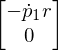

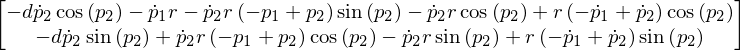

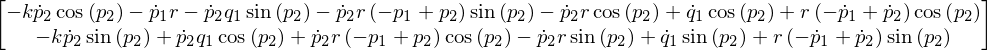

---


In [5]:
#Einheitsvektoren

ex = sp.Matrix([1,0])
ey = sp.Matrix([0,1])

# Rotationsmatrix um z-Achse (aus der Bildebene heraus)
Rz = mt.Rz


# Koordinaten der Schwerpunkte und Gelenke

# Nomenklatur-Zuordnung:
# p1: theta
# p2: psi
# q1: gamma

xC = -r * p1
yC = 0
C = sp.Matrix([xC, yC]) # Mittelpunkt Zylinder

# Berührungspunkt (tangent point): Brett-Zylinder
TP = C + r*Rz(p2) * ey

# Mittelpunkt Brett
# (Annahme: Anfangszustand (p1=p2=0): TP=B
# Punkte differieren nur durch Abrollen
B = TP + Rz(p2)*ex*r*(p2 - p1)

E = B + Rz(p2)*ey*d # Schwerpunkt Brett
P = B + Rz(p2)*(ey*k+ ex*q1) # Schwerpunkt Schlitten



# Zeitableitungen der Schwerpunktskoordinaten
Cd, Ed, Pd = st.col_split(st.time_deriv(st.col_stack(C, E, P), ttheta)) ##

In [6]:
# Energie
T_rot = ( IC*pdot1**2 + IB*pdot2**2 + IP*pdot2**2 )/2
T_trans = ( mC*Cd.T*Cd  +  mB*Ed.T*Ed + mP*Pd.T*Pd )/2
T = T_rot + T_trans[0]

V = mB*g*B[1] + mP*g*P[1]

In [7]:
mod = mt.generate_symbolic_model(T, V, ttheta, [0, 0, tau3])

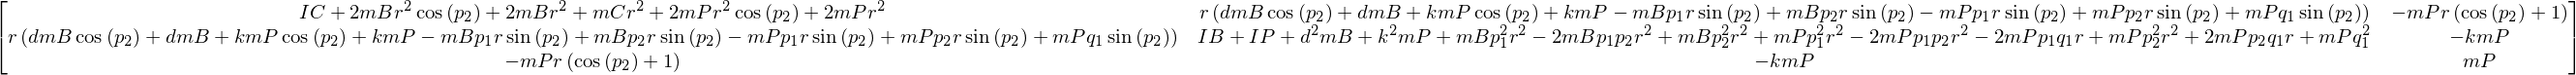

In [8]:
# Massenmatrix
mod.MM.simplify()
mod.MM

In [9]:
# LaTeX ausschalten (Platz sparen)
printing.init_printing(0)

In [10]:
# Bewegungsgleichungen
# Wieviele Ausdrücke (count ops)? 
mod.eqns.co ##:
mod.eqns

mod.eqns.co  := Matrix([
[221],
[237],
[ 32]])

___


Matrix([
[                                                        IC*pddot1 + d*mB*pddot2*r*cos(p2) + d*mB*pddot2*r - d*mB*pdot2**2*r*sin(p2) - g*mB*r*sin(p2) - g*mP*r*sin(p2) + k*mP*pddot2*r*cos(p2) + k*mP*pddot2*r - k*mP*pdot2**2*r*sin(p2) - mB*p1*pddot2*r**2*sin(p2) - mB*p1*pdot2**2*r**2*cos(p2) - mB*p1*pdot2**2*r**2 + mB*p2*pddot2*r**2*sin(p2) + mB*p2*pdot2**2*r**2*cos(p2) + mB*p2*pdot2**2*r**2 + 2*mB*pddot1*r**2*cos(p2) + 2*mB*pddot1*r**2 - 2*mB*pdot1*pdot2*r**2*sin(p2) + mB*pdot2**2*r**2*sin(p2) + mC*pddot1*r**2 - mP*p1*pddot2*r**2*sin(p2) - mP*p1*pdot2**2*r**2*cos(p2) - mP*p1*pdot2**2*r**2 + mP*p2*pddot2*r**2*sin(p2) + mP*p2*pdot2**2*r**2*cos(p2) + mP*p2*pdot2**2*r**2 + 2*mP*pddot1*r**2*cos(p2) + 2*mP*pddot1*r**2 + mP*pddot2*q1*r*sin(p2) - 2*mP*pdot1*pdot2*r**2*sin(p2) + mP*pdot2**2*q1*r*cos(p2) + mP*pdot2**2*q1*r + mP*pdot2**2*r**2*sin(p2) + 2*mP*pdot2*qdot1*r*sin(p2) - mP*qddot1*r*cos(p2) - mP*qddot1*r],
[IB*pddot2 + IP*pddot2 + d**2*mB*pddot2 + d*mB*pddot1*r*cos(p2) + d*mB*pd

### Bestimmung der partiell lineariserten Systemgleichungen

In [11]:
# dauert ggf. ein paar Minuten
%time mod.calc_coll_part_lin_state_eq(simplify=True)

CPU times: user 5min 20s, sys: 140 ms, total: 5min 20s
Wall time: 5min 20s


In [12]:
mod.ff.co

Matrix([
[  1],
[  1],
[  1],
[430],
[402],
[  0]])

In [13]:
mod.gg.co

Matrix([
[  0],
[  0],
[  0],
[211],
[183],
[  1]])

In [14]:
# Vektorfeld f
mod.ff

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [15]:
# Vektorfeld g1

In [16]:
G = mod.gg 
G.co ##:
g1, = st.col_split(G) ##:

G.co  := Matrix([
[  0],
[  0],
[  0],
[211],
[183],
[  1]])

___


g1, := Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  0],
[                                                                                                                                                                                                                                                                

---
